In [4]:
import sys
sys.path.append("/vol/bitbucket/ad6013/Research/gp-causal/data")

from pairs.generate_pairs import TubingenPairs


data_gen = TubingenPairs(path='/vol/bitbucket/ad6013/Research/gp-causal/data/pairs/files')

x, y, weight = [], [], []
for i in data_gen.pairs_generator():
    x.append(i[0])
    y.append(i[1])
    weight.append(i[2])

Load cause-effect pairs: 100%|██████████| 100/100 [00:00<00:00, 212.10it/s]


In [5]:
import gpflow
import tensorflow as tf
import numpy as np


rng = np.random.RandomState(0)
tf.random.set_seed(0)

In [6]:
from gpflow.utilities import print_summary

# SGPR Test
k = gpflow.kernels.Matern52()
print_summary(k)


╒═══════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                  │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═══════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Matern52.variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├───────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Matern52.lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═══════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛


In [7]:
inducing = x[0][:500]
m = gpflow.models.SGPR((x[0], y[0]), k, inducing)

In [8]:
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=1000))
print_summary(m)


2022-04-07 16:38:22.436149: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


╒══════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤══════════╤═════════╤═════════════════════╕
│ name                     │ class     │ transform        │ prior   │ trainable   │ shape    │ dtype   │ value               │
╞══════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪══════════╪═════════╪═════════════════════╡
│ SGPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()       │ float64 │ 23.87485073313259   │
├──────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼──────────┼─────────┼─────────────────────┤
│ SGPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()       │ float64 │ 805.7702486310004   │
├──────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼──────────┼─────────┼─────────────────────┤
│ SGPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()       │ float64 │ 0.4106

In [9]:
opt_logs.x

array([ 2.04999760e+02,  4.59999945e+01,  7.94000014e+02,  3.25000036e+02,
        5.00000839e+02,  2.14999872e+02,  3.83000149e+02,  5.40003837e+01,
        6.29999988e+02,  4.13000537e+02,  4.81000388e+02,  4.19998166e+01,
        2.41999976e+02,  1.63999956e+02,  4.61999972e+02,  5.59999819e+02,
        4.00002156e+00,  6.21999684e+02,  2.39000008e+02,  4.00003727e+01,
        3.29999950e+02,  7.89000064e+02,  4.49999610e+02,  4.00003728e+01,
        2.51998508e+02,  4.45002920e+02,  6.00001036e+01,  5.79999462e+01,
        3.60007448e+01,  4.89997936e+01,  8.40005065e+01,  1.20001015e+02,
        3.62999240e+02,  2.89998555e+02,  4.11999074e+02,  7.99990879e+01,
        2.10001693e+01,  4.50005386e+01,  1.50002582e+01,  6.19994738e+01,
        8.74996049e+02,  4.99992298e+00,  3.72999509e+02,  9.99851817e-01,
        9.00010954e+00,  6.07000597e+02,  8.79997683e+01,  4.99992298e+00,
        6.99998704e+00,  1.14200011e+03,  5.49000444e+02,  3.09999043e+02,
        3.39999492e+02,  

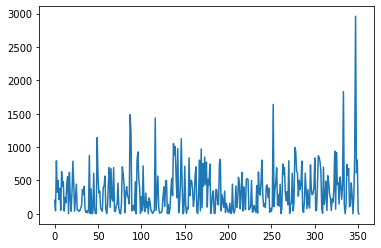

In [10]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(opt_logs.x)), opt_logs.x)
plt.show()

In [11]:
m.elbo()

<tf.Tensor: shape=(), dtype=float64, numpy=-361.0560678509103>

In [12]:
inducing = y[0][:500]
m1 = gpflow.models.SGPR((y[0], x[0]), k, inducing)

In [13]:
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m1.training_loss, m1.trainable_variables, options=dict(maxiter=1000))
print_summary(m1)


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/triangular_solve_1/MatrixTriangularSolve' defined at (most recent call last):
    File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 707, in start
      self.io_loop.start()
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 398, in dispatch_shell
      await result
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_3766534/3421687111.py", line 2, in <cell line: 2>
      opt_logs = opt.minimize(m1.training_loss, m1.trainable_variables, options=dict(maxiter=1000))
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/gpflow/optimizers/scipy.py", line 95, in minimize
      return scipy.optimize.minimize(
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_minimize.py", line 681, in minimize
      res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_lbfgsb_py.py", line 308, in _minimize_lbfgsb
      sf = _prepare_scalar_function(fun, x0, jac=jac, args=args, epsilon=eps,
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_optimize.py", line 263, in _prepare_scalar_function
      sf = ScalarFunction(fun, x0, args, grad, hess,
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_differentiable_functions.py", line 158, in __init__
      self._update_fun()
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_differentiable_functions.py", line 251, in _update_fun
      self._update_fun_impl()
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_differentiable_functions.py", line 155, in update_fun
      self.f = fun_wrapped(self.x)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_differentiable_functions.py", line 137, in fun_wrapped
      fx = fun(np.copy(x), *args)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_optimize.py", line 76, in __call__
      self._compute_if_needed(x, *args)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/scipy/optimize/_optimize.py", line 70, in _compute_if_needed
      fg = self.fun(x, *args)
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/gpflow/optimizers/scipy.py", line 137, in _eval
      loss, grad = _tf_eval(tf.convert_to_tensor(x))
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/gpflow/optimizers/scipy.py", line 119, in _tf_eval
      if first_call:
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/gpflow/optimizers/scipy.py", line 121, in _tf_eval
      loss, grads = _compute_loss_and_gradients(
    File "/vol/bitbucket/ad6013/envs/gp-causal-env/lib/python3.9/site-packages/gpflow/optimizers/scipy.py", line 225, in _compute_loss_and_gradients
      grads = tape.gradient(loss, variables, unconnected_gradients=unconnected_gradients)
Node: 'gradient_tape/triangular_solve_1/MatrixTriangularSolve'
Input matrix is not invertible.
	 [[{{node gradient_tape/triangular_solve_1/MatrixTriangularSolve}}]] [Op:__inference__tf_eval_2567]

In [24]:
elbo = tf.function(m.elbo)
tensor_data = tuple(map(tf.convert_to_tensor, (x[0], y[0])))


In [25]:
tensor_data

(<tf.Tensor: shape=(1,), dtype=float64, numpy=array([9.7])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.2])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([6.4])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.1])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([6.2])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([9.4])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([7.8])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.3])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([6.6])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.3])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([7.5])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([7.9])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.4])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.5])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([8.])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([7.6])>,
 <tf.Tensor: shape=(1,), 

In [26]:
obj = tf.function(m.maximum_log_likelihood_objective)

In [27]:
obj(tensor_data)

TypeError: in user code:


    TypeError: tf__maximum_log_likelihood_objective() takes 1 positional argument but 2 were given


In [15]:
from tqdm import trange

def run_adam(model, iterations, train_dataset, minibatch_size):
    """
    Utility function running the Adam optimizer

    :param model: GPflow model
    :param interations: number of iterations
    """
    t = trange(10000, desc="Running Model", leave=True, position=0)

    # Create an Adam Optimizer action
    logf = []
    train_iter = iter(train_dataset.batch(minibatch_size))
    training_loss = model.training_loss_closure(train_iter, compile=True)
    optimizer = tf.optimizers.Adam()

    @tf.function
    def optimization_step():
        optimizer.minimize(training_loss, model.trainable_variables)

    for step in trange(iterations):
        optimization_step()
        if step % 10 == 0:
            elbo = -training_loss().numpy()
            logf.append(elbo)
        if step % 25 == 0:
            t.set_description(f"Loss: {elbo}")
            t.refresh()
    return logf

In [16]:
def train(x, y, num_inducing):
    if len(x) < num_inducing + 1:
        inducing = x
    else:
        # kmeans = KMeans(n_clusters=num_inducing).fit(x_train)
        # inducing = kmeans.cluster_centers_
        inducing_idx = np.random.choice(x.shape[0], replace=False)
        inducing = np.take(x, inducing_idx, axis=0).float()

    sq_exp = gpflow.kernels.SquaredExponential()
    mat32 = gpflow.kernels.Matern32()
    mat52 = gpflow.kernels.Matern52() 
    kernel = gpflow.kernels.Sum([sq_exp, mat32, mat52])

    m = gpflow.models.SVGP(kernel, gpflow.likelihoods.Gaussian(), inducing, num_data=x.shape[0])

    minibatch_size = 100

    train_dataset = tf.data.Dataset.from_tensor_slices((x, y)).repeat().shuffle(x.shape[0])

    train_iter = iter(train_dataset.batch(minibatch_size))

    loss = run_adam(m, 10000, train_dataset, minibatch_size)
    print("Loss:", loss[-1])
    return loss
    

In [17]:
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

correct_idx = []
wrong_idx = []
num_inducing = 500

for i in tqdm(range(len(x)), desc="Epochs", leave=True, position=0):
    print(f'\n {i}')
    # Ignore the high dim
    if x[i].shape[-1] > 1:
        continue
    else:
        # Get data points
        x_train, y_train, weight_train = x[i], y[i], weight[i]
    # Make sure data is standardised 
    x_train = StandardScaler().fit_transform(x_train).astype(np.float64)
    y_train = StandardScaler().fit_transform(y_train).astype(np.float64)
    # x -> y score
    # Draw uniform 
    unif_samples = tf.random.uniform(
        shape=[x_train.shape[0], 1], dtype=tf.dtypes.float64,
    )
    loss_x = train(x=unif_samples, y=x_train, num_inducing=num_inducing)
    loss_x_y = train(x=x_train, y=y_train, num_inducing=num_inducing)
    # x <- y score
    # Draw uniform 
    unif_samples = tf.random.uniform(
        shape=[x_train.shape[0], 1], dtype=tf.dtypes.float64,
    )
    loss_y = train(x=unif_samples, y=y_train, num_inducing=num_inducing)
    loss_y_x = train(x=y_train, y=x_train, num_inducing=num_inducing)
    # Calculate losses
    score_x_y = loss_x[-1] + loss_x_y[-1]
    score_y_x = loss_y[-1] + loss_y_x[-1]
    if score_x_y < score_y_x:
        correct_idx.append(i)
    else:
        wrong_idx.append(i)

/tmp/ipykernel_3379371/3528438768.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(x)), desc="Epochs", leave=True, position=0):


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]


 0


Loss: -648.8394604965431:   0%|          | 0/10000 [00:10<?, ?it/s]

In [ ]:
unif_samples = tf.random.uniform(
    shape=[100, 1]
)

In [15]:
unif_samples.shape[0]

100